# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

In [2]:
link='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
online_rt = pd.read_csv(link, encoding = 'latin1')

In [4]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
online_rt.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [6]:
topcountr = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False).head(11)
topcountr = topcountr.iloc[1:11,]
topcountr

Country
Netherlands    200128
EIRE           142637
Germany        117448
France         110480
Australia       83653
Sweden          35637
Switzerland     30325
Spain           26824
Japan           25218
Belgium         23152
Name: Quantity, dtype: int64

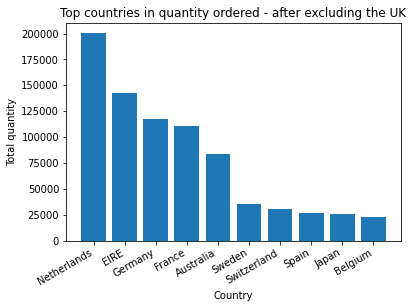

In [7]:
# plt.hist(top_sold.values, bins=top_sold.index)
plt.bar(x=list(topcountr.index.values), height=list(topcountr.values))
plt.xlabel("Country")
plt.ylabel("Total quantity")

plt.title("Top countries in quantity ordered - after excluding the UK")
plt.xticks(rotation=30, ha='right')
plt.show()

In [8]:
import seaborn as sns
sns.countplot(x=topcountr.index.values, data=topcountr.values)

AttributeError: 'numpy.ndarray' object has no attribute 'get'

### Step 5.  Exclude negative Quatity entries

In [9]:
online_rt = online_rt[online_rt.Quantity > 0]

In [10]:
online_rt.shape

(531285, 8)

In [11]:
online_rt.Quantity.describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [ ]:
import seaborn as sns

In [25]:
df = online_rt[online_rt.Country.isin(['Netherlands', 'EIRE', 'Germany'])]
# df = online_rt[online_rt.Country.isin(['Netherlands'])]
df = df.groupby(['CustomerID','UnitPrice','Country']).Quantity.sum().reset_index()

# df=pd.merge(df, online_rt, how="outer", on='CustomerID')
df

,CustomerID,UnitPrice,Country,Quantity
0,12426.0,0.10,Germany,25
1,12426.0,0.85,Germany,12
2,12426.0,1.25,Germany,58
3,12426.0,1.65,Germany,48
4,12426.0,1.69,Germany,12
...,...,...,...,...
2260,14911.0,39.95,EIRE,2
2261,14911.0,49.95,EIRE,2
2262,14911.0,50.00,EIRE,83
2263,14911.0,165.00,EIRE,1


<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

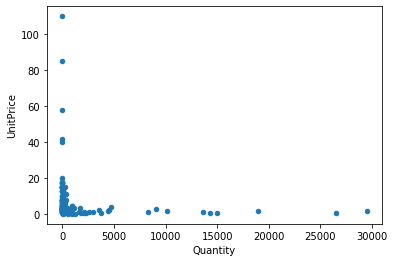

In [24]:
df.plot(x='Quantity', y='UnitPrice', kind='scatter')

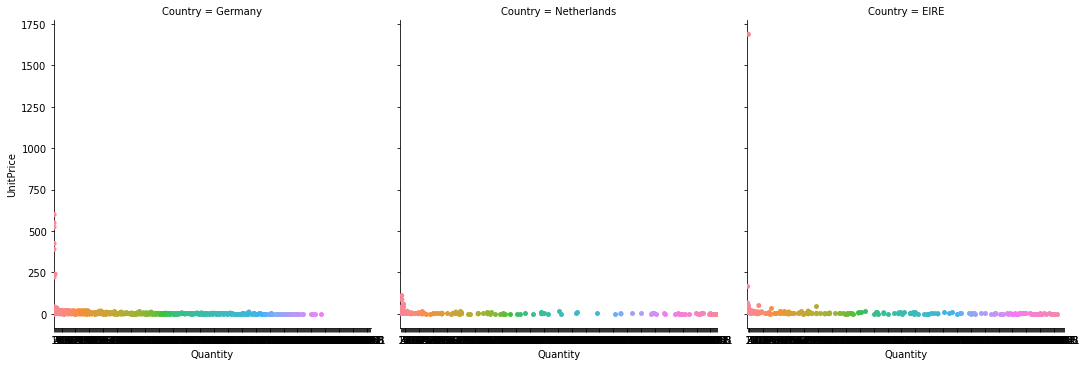

In [17]:
# Factor Plot
# g = sns.scatterplot(data=df, x='Quantity', y='UnitPrice',hue='Country')
g = sns.catplot(data=df, x='Quantity', y='UnitPrice',col='Country')


### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [26]:
df = online_rt[online_rt.Country.isin(['Netherlands', 'EIRE', 'Germany'])]
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/10 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/10 13:04,1.95,12662.0,Germany
1114,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,12/1/10 13:04,1.65,12662.0,Germany
1115,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,12/1/10 13:04,0.42,12662.0,Germany
1116,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,12/1/10 13:04,1.95,12662.0,Germany


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [29]:
df.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [100]:
step713 = online_rt[online_rt['CustomerID'].isin ([12346])]
step713

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,PriceInterval
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom,77183.6,"(1, 2]"


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [35]:
topcountr = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False).head(4)
topcountr = topcountr.iloc[1:4,]
topcountr

Country
Netherlands    200937
EIRE           147447
Germany        119263
Name: Quantity, dtype: int64

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [39]:
online_rt.Quantity.describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [36]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.Revenue.describe()

count    531285.00000
mean         20.03550
std         270.91237
min      -11062.06000
25%           3.75000
50%           9.90000
75%          17.70000
max      168469.60000
Name: Revenue, dtype: float64

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [41]:
df = online_rt[online_rt.Country.isin(['Netherlands', 'EIRE', 'Germany'])]
df = df.groupby(['CustomerID','Country']).agg({'Quantity':'sum','Revenue':'sum'}).reset_index()
df['AvgPrice'] = 1 /(df.Quantity / df.Revenue)
df

,CustomerID,Country,Quantity,Revenue,AvgPrice
0,12426.0,Germany,258,582.73,2.258643
1,12427.0,Germany,533,825.80,1.549343
2,12468.0,Germany,366,729.54,1.993279
3,12471.0,Germany,8212,19824.05,2.414034
4,12472.0,Germany,4148,6572.11,1.584405
...,...,...,...,...,...
101,14016.0,EIRE,2125,4341.21,2.042922
102,14156.0,EIRE,57885,117379.63,2.027807
103,14335.0,Germany,379,468.26,1.235515
104,14646.0,Netherlands,197491,280206.02,1.418829


##### Step 7.3.3 Plot

<AxesSubplot:xlabel='Quantity', ylabel='Revenue'>

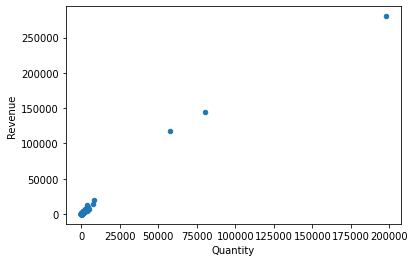

In [113]:
df.plot(x='Quantity', y='Revenue', kind='scatter')

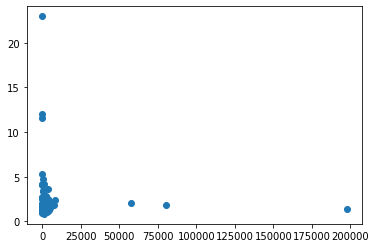

In [46]:
plt.scatter(data=df, x='Quantity', y='AvgPrice')
plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

In [47]:
df2 = online_rt.groupby(['CustomerID','Country']).agg({'Quantity':'sum','Revenue':'sum'}).reset_index()
df2['AvgPrice'] = 1 /(df2.Quantity / df2.Revenue)
df2

,CustomerID,Country,Quantity,Revenue,AvgPrice
0,12346.0,United Kingdom,74215,77183.60,1.040000
1,12347.0,Iceland,2458,4310.00,1.753458
2,12348.0,Finland,2341,1797.24,0.767723
3,12349.0,Italy,631,1757.55,2.785341
4,12350.0,Norway,197,334.40,1.697462
...,...,...,...,...,...
4342,18280.0,United Kingdom,45,180.60,4.013333
4343,18281.0,United Kingdom,54,80.82,1.496667
4344,18282.0,United Kingdom,103,178.05,1.728641
4345,18283.0,United Kingdom,1397,2094.88,1.499556


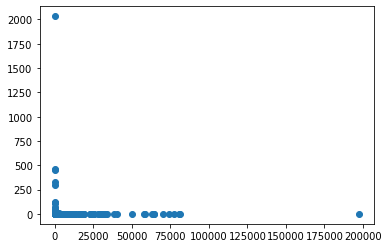

In [48]:
plt.scatter(data=df2, x='Quantity', y='AvgPrice')
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

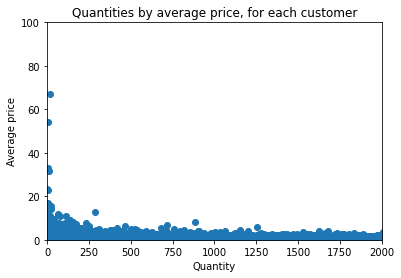

In [52]:
plt.axis([0,2000,0,100])
plt.scatter(data=df2, x='Quantity', y='AvgPrice')
plt.xlabel('Quantity')
plt.ylabel('Average price')
plt.title('Quantities by average price, for each customer')
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [56]:
online_rt.UnitPrice.describe()

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [62]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


In [65]:
online_rt['PriceInterval'] = pd.cut(online_rt.UnitPrice, range(51))

In [73]:
online_rt[online_rt.UnitPrice < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,PriceInterval
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom,-11062.06,NaN


In [74]:
df2 = online_rt.groupby(['PriceInterval']).agg({'Quantity':'sum','Revenue':'sum'}).reset_index()
df2['AvgPrice'] = 1 /(df2.Quantity / df2.Revenue)
df2

,PriceInterval,Quantity,Revenue,AvgPrice
0,"(0, 1]",2123919,1.107775e+06,0.521571
1,"(1, 2]",1841466,2.691765e+06,1.461751
2,"(2, 3]",837931,2.024143e+06,2.415644
3,"(3, 4]",243381,8.651018e+05,3.554516
4,"(4, 5]",269647,1.219377e+06,4.522124
5,"(5, 6]",68226,3.910014e+05,5.730974
6,"(6, 7]",40356,2.689226e+05,6.663758
7,"(7, 8]",39984,3.062052e+05,7.658194
8,"(8, 9]",45187,3.800438e+05,8.410467
9,"(9, 10]",16677,1.638377e+05,9.824173


#### 8.3 Plot.

In [97]:
df2.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

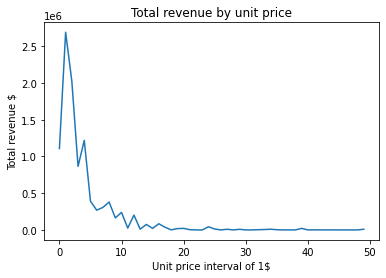

In [99]:
plt.plot(df2.index.values, df2.Revenue)

plt.xlabel('Unit price interval of 1$')
plt.ylabel('Total revenue $')
plt.title('Total revenue by unit price')

plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

In [104]:
10000.21.format("  #,###")
x

AttributeError: 'float' object has no attribute 'format'

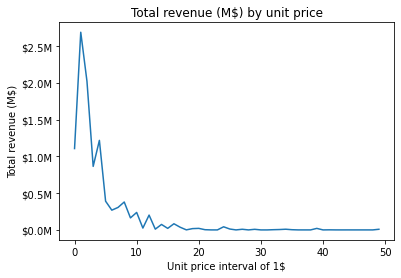

In [111]:
fig, ax = plt.subplots()

# Use automatic StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.1f}M')
plt.plot(df2.index.values, df2.Revenue*1e-6)

plt.xlabel('Unit price interval of 1$')
plt.ylabel('Total revenue (M$)')
plt.title('Total revenue (M$) by unit price')

plt.show()

### BONUS: Create your own question and answer it.